## Tarea 2
### Reinforcement Learning
#### Wilmar Calderón
#### 201630701


In [45]:
# Import of required libraries
import numpy as np
import random

In [51]:
class snakes_ladders:
    #Class constructor function
    #In: list: blues (winning locations), list: reds (loosing locations), 
    #snakes: dict with the update of blocks (decrease), stairs: dict with the update of blocks (increase)
    #list: p (transition probabilities), float: disc (discount rate)
    def __init__(self,blues,reds,snakes, stairs,p,disc):
        self.states = list (range(1,101)) #Creates the 100 boxes of the game board
        self.actions = [-1,1] #Defines the possible actions: -1: backward, 1:forward
        self.p = p #Assigns the transition probabilities (paramterized)
        self.gamma = disc #defines the discount rate.
        self.blues=blues #Defines the winning boxes
        self.reds=reds #Defines the loosing boxes
        self.snakes=snakes #Defines the snakes (worse locations)
        self.stairs=stairs #Defines the stairs (better locations)


    #function to update the state
    #IN: s_t=current state, a_t=action taken (forward or backward)
    #out: Reward of the movement, s_t1=state after taking action a_t
    def move(self,s_t,a_t):
        size=random.choices([1,2,3,4,5,6],weights=self.p,k=1)[0]
        s_t1=s_t+size*a_t

        #check the bounds
            #adjusts for values lower than 1. if s'<1: formula: s_t+1=1-(s_t'-1), simplified: s_t+1=2-s'
        if s_t1<1:
            s_t1=2-s_t1
        #adjusts for values greater than 100. if s'>100: formula: s_t+1=100-(s_t'-100), simplified: s_t+1=200-s'
        elif s_t1>100:
            s_t1=200-s_t1

        #Checks for the snakes and stairs
        if s_t1 in self.stairs:
            s_t1=self.stairs[s_t1] #s_t1 is the dict key, returns the value of the updated location

        if s_t1 in self.snakes:
            s_t1=self.snakes[s_t1] #s_t1 is the dict key, returns the value of the updated location

        #Calculates the rewards based on the state s_t+1
        if s_t1 in self.blues: #Winning
            reward=1
        if s_t1 in self.reds: #Loosing
            reward=-1
        else: #all the others
            reward=0

        return reward,s_t1


# Example parameters
blue_positions = [100]  # Victory position (in the case ther is a ladder of 80 to 100, so it wins)
red_positions = [23,37,45,67,89]  # Losing position
snakes = {98: 28, 95:24, 92:51,73:1,64:28,69:33,59:17,
          52:11,44:22,48:9}  # Snakes (head -> tail)
ladders = {80:100, 21:82, 62:96, 50:91,54:93, 83:19,
           66:87, 43:77,55:7,8:26}  # Ladders (bottom -> top)
p = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]  # Fair dice
disc=0.99
# Create MDP
mdp = snakes_ladders(blue_positions, red_positions, snakes, ladders, p,disc)

# Example move
state = 7
reward,new_state = mdp.move(state, 1)  # Move forward
print(f"State: {state}")

print(f"New State: {new_state}, Reward: {reward}")
    

State: 7
New State: 26, Reward: 0


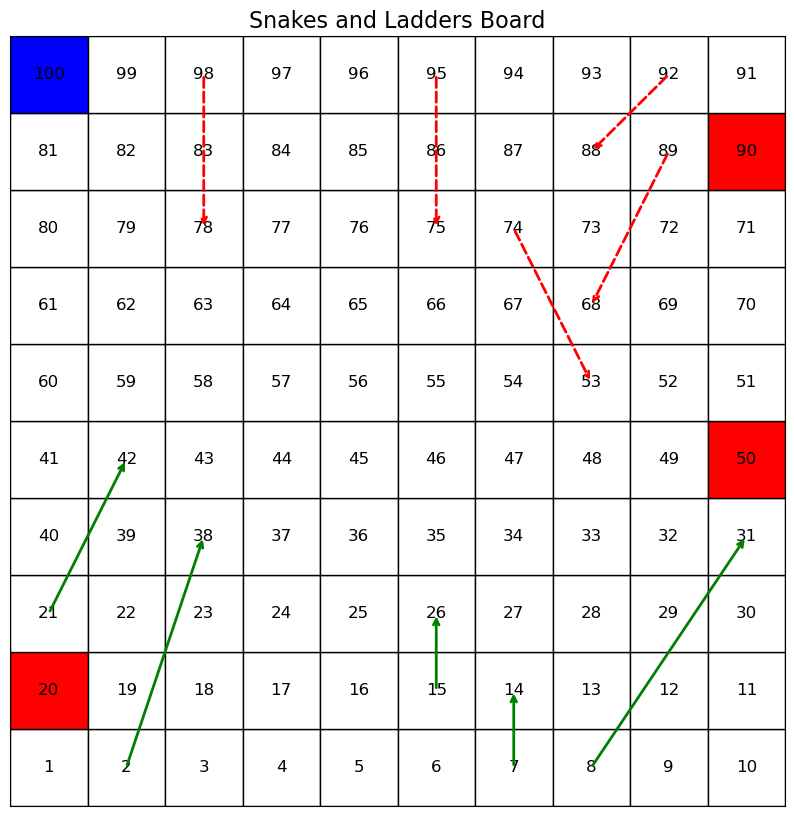

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def plot_snakes_and_ladders(blue_positions, red_positions, snakes, ladders):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

    # Draw the grid with correct numbering
    for row in range(10):
        for col in range(10):
            actual_row = row  # Ensures 1 is at the bottom-left
            if actual_row % 2 == 0:
                cell_number = actual_row * 10 + (col + 1)  # Left to right
            else:
                cell_number = actual_row * 10 + (10 - col)  # Right to left

            # Define cell color
            cell_color = 'white'
            if cell_number in blue_positions:
                cell_color = 'blue'
            elif cell_number in red_positions:
                cell_color = 'red'

            # Draw the cell
            rect = patches.Rectangle((col, row), 1, 1, linewidth=1, edgecolor='black', facecolor=cell_color)
            ax.add_patch(rect)

            # Add the cell number
            ax.text(col + 0.5, row + 0.5, str(cell_number), ha='center', va='center', fontsize=12, color='black')

    # Function to find cell position (col, row)
    def get_cell_position(cell_number):
        row = (cell_number - 1) // 10  # Determine row
        if row % 2 == 0:
            col = (cell_number - 1) % 10  # Left to right
        else:
            col = 9 - ((cell_number - 1) % 10)  # Right to left
        return col + 0.5, row + 0.5  # Return center of the cell

    # Draw ladders (green arrows)
    for bottom, top in ladders.items():
        start_x, start_y = get_cell_position(bottom)
        end_x, end_y = get_cell_position(top)
        ax.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                    arrowprops=dict(arrowstyle="->", color="green", lw=2))

    # Draw snakes (red curved arrows)
    for head, tail in snakes.items():
        start_x, start_y = get_cell_position(head)
        end_x, end_y = get_cell_position(tail)
        ax.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                    arrowprops=dict(arrowstyle="->", color="red", lw=2, linestyle="dashed"))

    plt.title("Snakes and Ladders Board", fontsize=16)
    plt.show()

# Example positions
blue_positions = [100]  # Winning position
red_positions = [90, 50, 20]  # Losing positions
snakes = {98: 78, 95: 75, 92: 88, 89: 68, 74: 53}  # Snakes (head -> tail)
ladders = {2: 38, 7: 14, 8: 31, 15: 26, 21: 42}  # Ladders (bottom -> top)

# Plot the board with snakes and ladders
plot_snakes_and_ladders(blue_positions, red_positions, snakes, ladders)
